In [ ]:
!pip install seaborn
!pip install opencv.python
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
import glob as gb
import tensorflow as tf
import keras
import time
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = '/content/drive/MyDrive/Colab Notebooks/flower_images/Train/'
test_data = '/content/drive/MyDrive/Colab Notebooks/flower_images/Test/'
pred_data = '/content/drive/MyDrive/Colab Notebooks/flower_images/Pred/Unknown/'
print(os.listdir(pred_data))

['00f36a3c40.jpg', '0da98adfa1.jpg', '0dd416ef58.jpg', '0d65659910.jpg', '0cd15008ae.jpg', '0df4b52aca.jpg', '0dd636f187.jpg', '0f2d4ef658.jpg', '00a7d512d6.jpg', '0d0d9402ae.jpg', '0da73f3c61.jpg', '0c7b09b5d3.jpg', '0b1b4fb598.jpg', '0f08548ec8.jpg', '0a3700189a.jpg', '0c1ec48a64.jpg', '0c98308a08.jpg', '0dbd885982.jpg', '0f684636c4.jpg', '0f402885f5.jpg', '0dfaf0300b.jpg', '0cad97f7dc.jpg', '0c64ddbd36.jpg', '0e77d04168.jpg', '0f8e44ea8f.jpg', '0a4ffd9788.jpg', '0f059b8043.jpg', '0f764ed822.jpg', '0ad0cd94c1.jpg', '0f127c677f.jpg', '1a6acb0e49.jpg', '0b606f8000.jpg', '0e436e9b09.jpg', '0ae6ffa4ee.jpg', '0cd4d2960b.jpg', '0c58cee30f.jpg', '0ac3d917e3.jpg', '0e8428ce72.jpg', '0c0d2ac60b.jpg', '0ae8156e1f.jpg', '00d715b92f.jpg', '0d78d8b0c1.jpg', '0c130ecf58.jpg', '0cb118c23e.jpg', '0e9034ef45.jpg', '0b48ca8a70.jpg', '0b049259b0.jpg', '0cefb8c7b3.jpg', '0a6129610d.jpg', '0b64a9d9a9.jpg', '0c319b3498.jpg', '0d9b5a120f.jpg', '0a3cb9a0f6.jpg', '0cd6203ae7.jpg', '0a6dca3334.jpg', '0c18b0c6

In [ ]:

for folder in os.listdir(train_data):
  files = gb.glob(pathname=str(train_data + folder + '/*'))
  print(f'For Training  Data , Found  {len(files)} in Folder  {folder}')

For Training  Data , Found  790 in Folder  Lilly
For Training  Data , Found  790 in Folder  Lotus
For Training  Data , Found  790 in Folder  Sunflower
For Training  Data , Found  790 in Folder  Orchid
For Training  Data , Found  790 in Folder  Tulip


In [ ]:

for folder in os.listdir(test_data):
  files = gb.glob(pathname=str(test_data + folder + '/*'))
  print(f'For Test  Data , Found  {len(files)} in Folder  {folder}')

For Test  Data , Found  190 in Folder  Lotus
For Test  Data , Found  190 in Folder  Orchid
For Test  Data , Found  190 in Folder  Tulip
For Test  Data , Found  190 in Folder  Lilly
For Test  Data , Found  190 in Folder  Sunflower


In [ ]:

files = gb.glob(pathname=str(pred_data + '/*'))
print(f'For pred  Data , Found {len(files)}')

For pred  Data , Found 100


In [ ]:
code = {'Tulip': 0,'Sunflower':1,'Orchid':2,'Lotus':3,'Lilly':4}
def getcode(n):
  for x, y in code.items():
    if n == y:
      return x


In [ ]:
size = []
for folder in os.listdir (train_data):
    files = gb.glob(pathname=str(train_data + folder + '/*'))
    for file in files :
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()


(183, 275, 3)      454
(225, 225, 3)      299
(168, 300, 3)      156
(275, 183, 3)      117
(194, 259, 3)      101
                  ... 
(334, 516, 3)        1
(620, 1200, 3)       1
(2173, 3165, 3)      1
(1508, 800, 3)       1
(393, 612, 3)        1
Name: count, Length: 1170, dtype: int64

In [ ]:
size = []
for folder in os.listdir (test_data):
    files = gb.glob(pathname=str(test_data + folder + '/*'))
    for file in files :
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()


(183, 275, 3)    109
(225, 225, 3)     69
(177, 284, 3)     40
(168, 300, 3)     31
(275, 183, 3)     31
                ... 
(184, 273, 3)      1
(445, 640, 3)      1
(368, 612, 3)      1
(280, 618, 3)      1
(559, 480, 3)      1
Name: count, Length: 414, dtype: int64

In [ ]:
# resizing
Img_size = 150
X_train = []
y_train = []
for folder in os.listdir(train_data):
    files = gb.glob(pathname=str(train_data + folder + '/*'))
    for file in files:
        image = cv2.imread(file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_array = cv2.resize(image, (Img_size, Img_size))
        X_train.append(list(image_array))
        y_train.append(code[folder])




In [ ]:
 # Convert the list of images to a NumPy array
X_train = np.array(X_train)
y_train = np.array(y_train)

# Normalize pixel values
X_train = X_train / 255.0

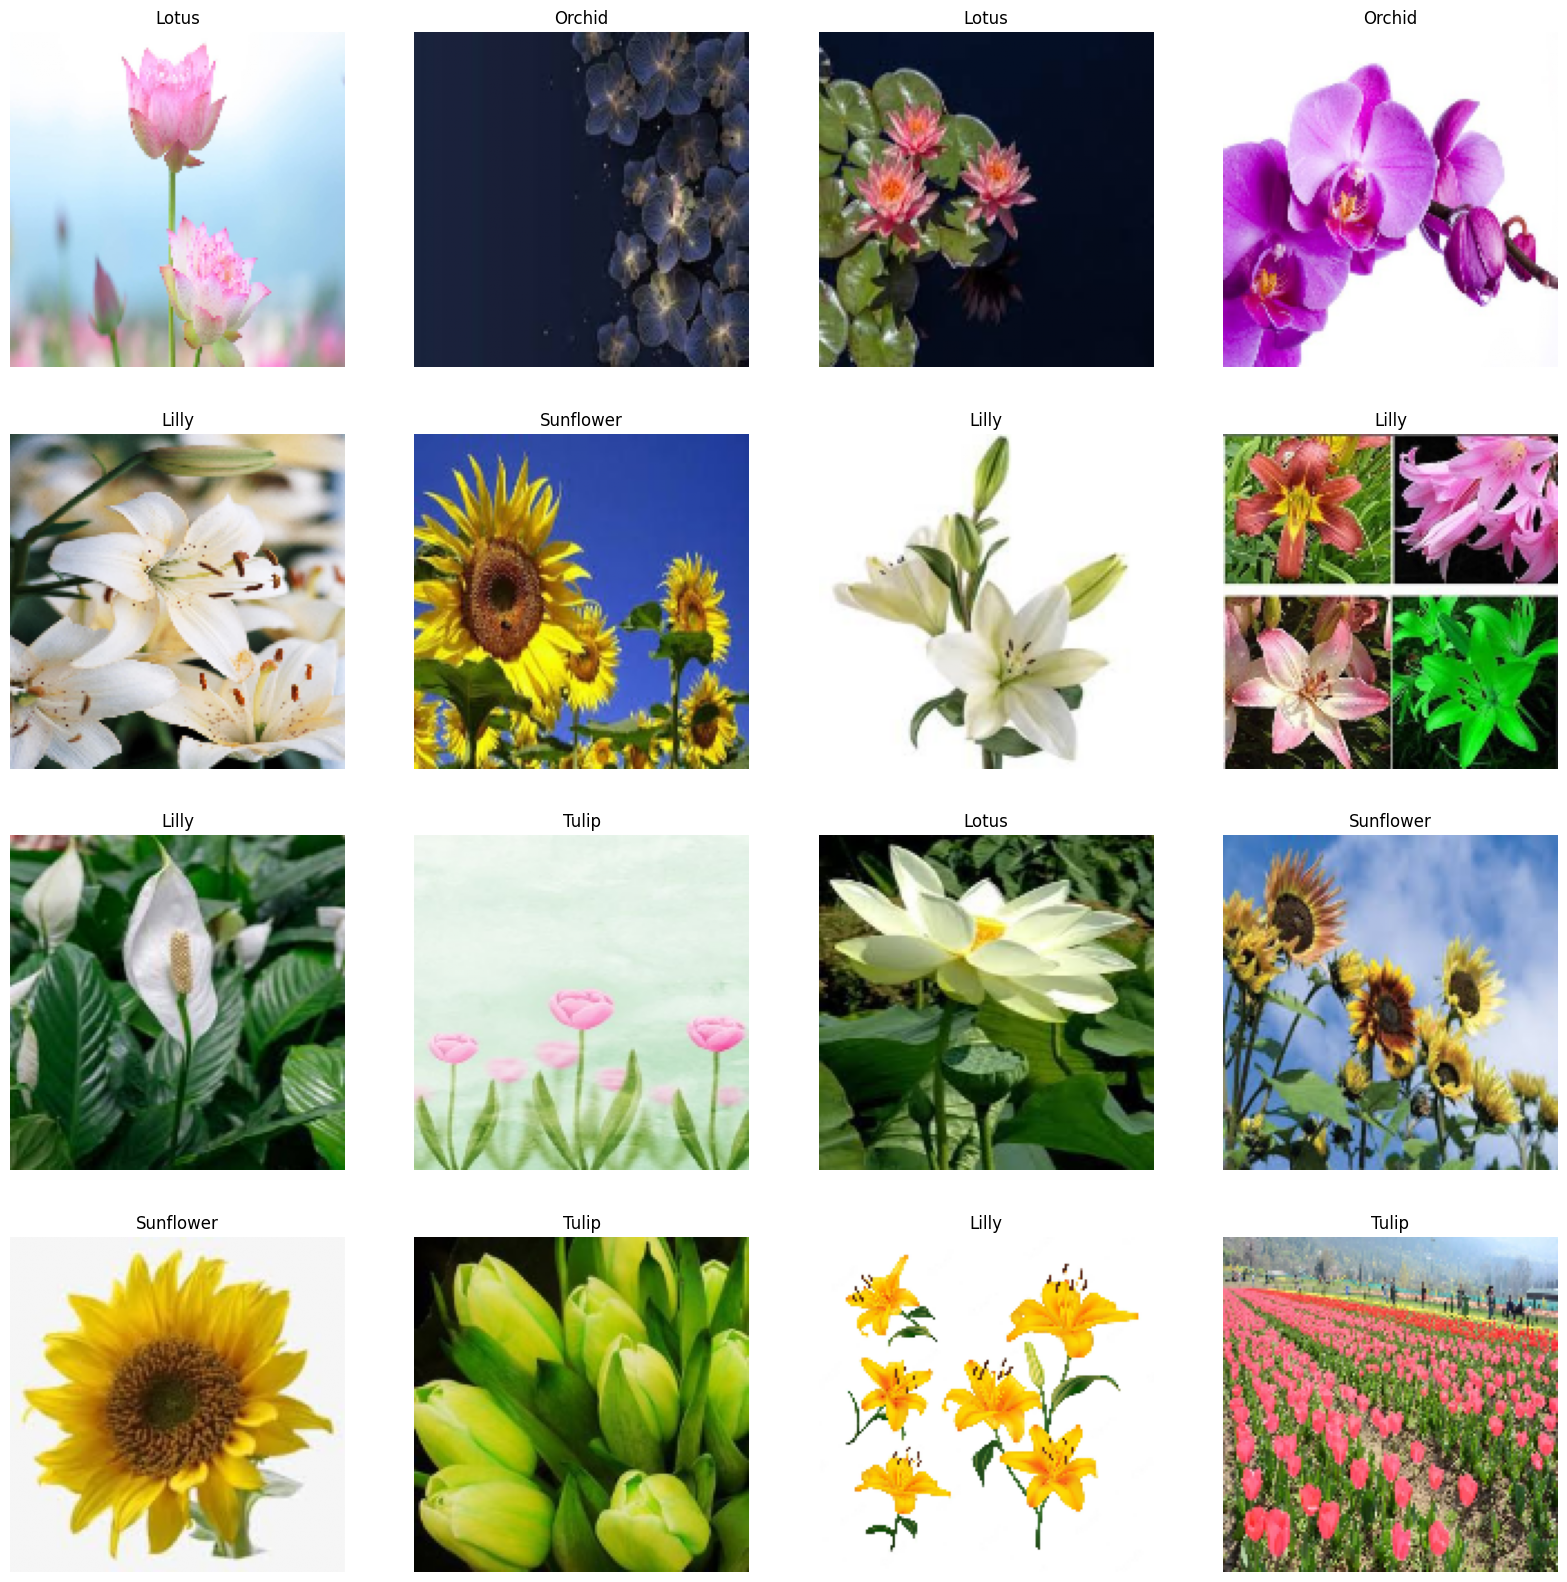

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),16))) :
  plt.subplot(4,4,n+1)
  plt.imshow(X_train[i])
  plt.axis('off')
  plt.title(getcode(y_train[i]))



In [ ]:
X_test = []
y_test = []
for folder in os.listdir(test_data):
    files = gb.glob(pathname=str(test_data + folder + '/*'))
    for file in files:
        image = cv2.imread(file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_array = cv2.resize(image, (Img_size, Img_size))
        X_test.append(list(image_array))
        y_test.append(code[folder])


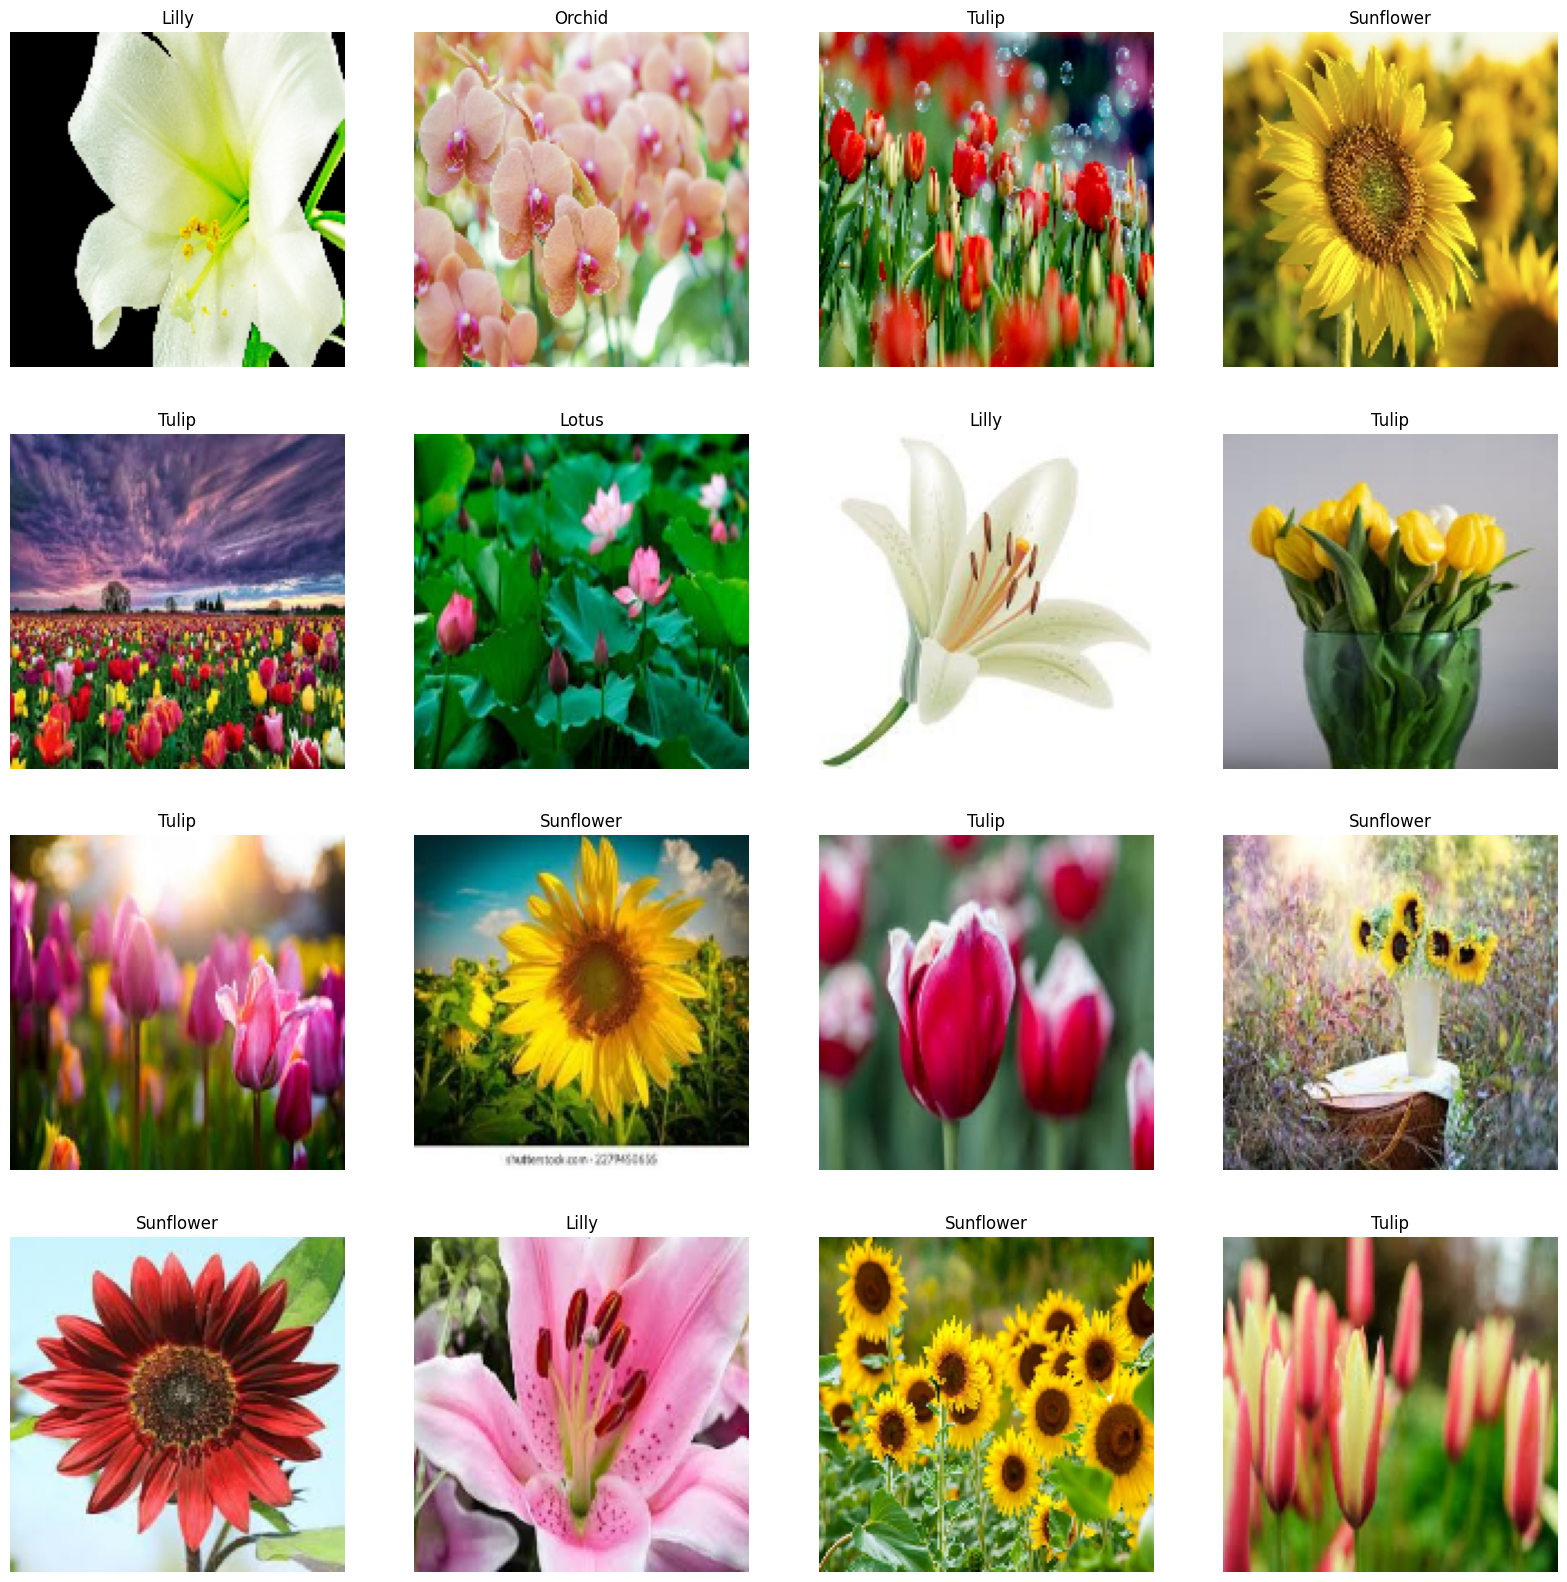

In [ ]:
# -----------------------------------
# print random img for Test
# -----------------------------------
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),16))) :#
  plt.subplot(4,4,n+1)
  plt.imshow(X_test[i])
  plt.axis('off')
  plt.title(getcode(y_test[i]))



In [ ]:
X_pred = []
files = gb.glob(pathname=str(pred_data+ '/*'))
for file in files:
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_array = cv2.resize(image, (Img_size, Img_size))
    X_pred.append(list(image_array))
print(f'We have {len(X_pred)} Images for Pred')


We have 100 Images for Pred


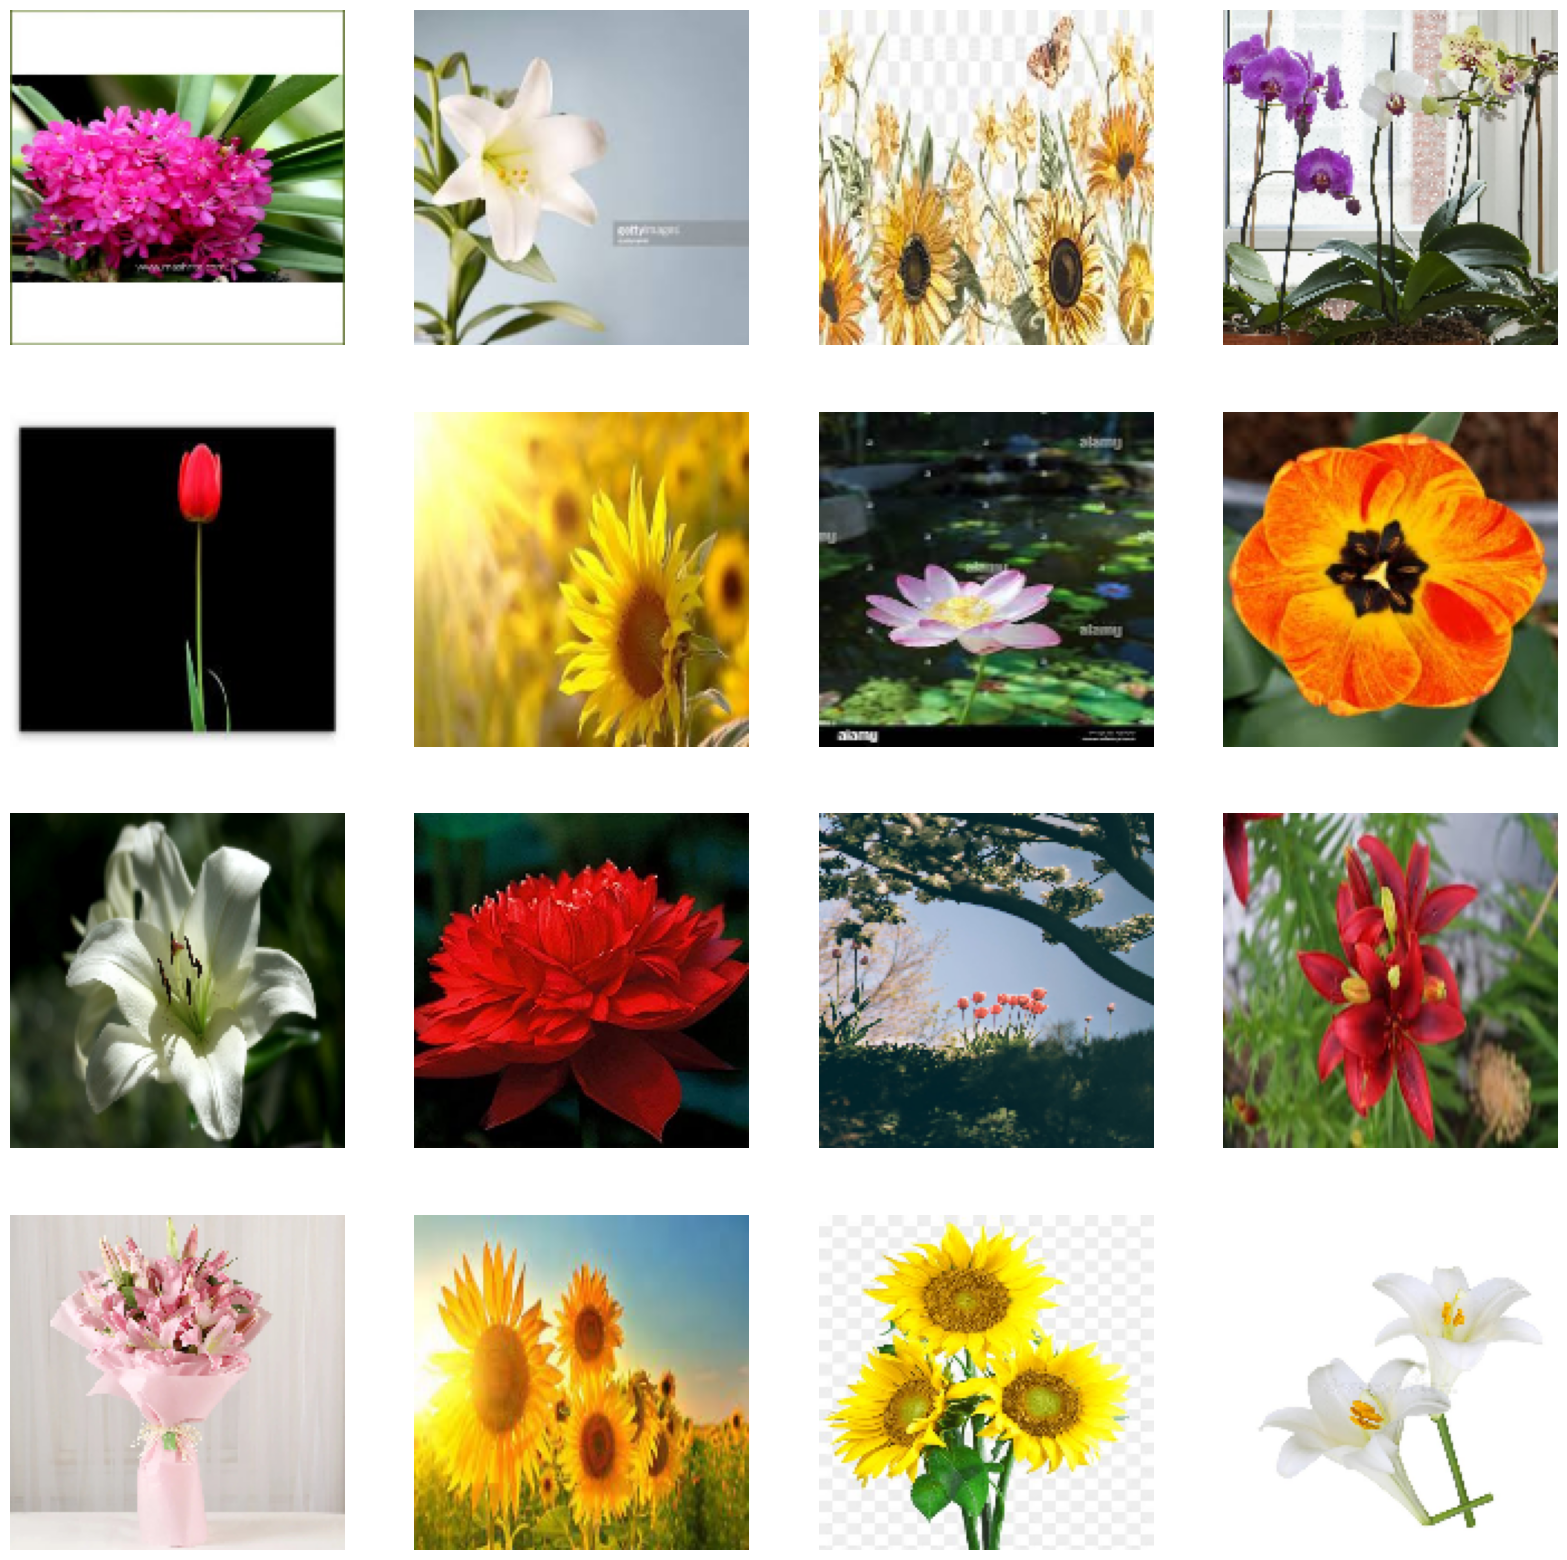

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),16))) :
    plt.subplot(4,4,n+1)
    plt.imshow(X_pred[i])
    plt.axis('off')

In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
X_pred_array=np.array(X_pred)
y_train=np.array(y_train)
y_test=np.array(y_test)
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('X_pred shape: ',X_pred_array.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)


X_train shape:  (3950, 150, 150, 3)
X_test shape:  (950, 150, 150, 3)
X_pred shape:  (100, 150, 150, 3)
y_train shape:  (3950,)
y_test shape:  (950,)


In [ ]:

KerasModel=keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(Img_size, Img_size, 3)),
    keras.layers.BatchNormalization(),  
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),  
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(5, activation='softmax')
])

In [ ]:
KerasModel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print('Model Summary')
print(KerasModel.summary())
epochs=10
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True  
)
history=KerasModel.fit(X_train,y_train,epochs=epochs,batch_size=64,verbose=1)
ModelLoss,ModelAccuracy=KerasModel.evaluate(X_test,y_test)


Model Summary


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 148, 148, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 34, 34, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,669 (772.14 KB)

 Trainable params: 197,221 (770.39 KB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 451s 7s/step - accuracy: 0.7803 - loss: 0.5967
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 472s 7s/step - accuracy: 0.8206 - loss: 0.5229
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 411s 7s/step - accuracy: 0.8391 - loss: 0.4411
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 443s 7s/step - accuracy: 0.8497 - loss: 0.4049
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 416s 7s/step - accuracy: 0.8757 - loss: 0.3610
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 439s 7s/step - accuracy: 0.8857 - loss: 0.3276
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 442s 7s/step - accuracy: 0.9031 - loss: 0.2831
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 443s 7s/step - accuracy: 0.9085 - loss: 0.2718
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 440s 7s/step - accuracy: 0.9186 - loss: 0.2426
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 410s 7s/step - accuracy: 0.9307 - loss: 0.2158
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 638ms/step - accuracy: 0.7458 - loss: 0.9424



Train Accuracy: 0.91
Train Loss: 0.27
Test Accuracy: 0.78
Test Loss: 0.79
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 642ms/step

Classification Report:
              precision    recall  f1-score   support

       Lotus       0.56      0.94      0.71       190
      Orchid       0.95      0.89      0.92       190
       Tulip       0.84      0.79      0.82       190
       Lilly       0.91      0.67      0.77       190
   Sunflower       0.85      0.61      0.71       190

    accuracy                           0.78       950
   macro avg       0.82      0.78      0.78       950
weighted avg       0.82      0.78      0.78       950


Confusion Matrix:
[[179   0   5   3   3]
 [ 20 169   0   0   1]
 [ 28   0 151   3   8]
 [ 41   5   9 127   8]
 [ 49   3  15   7 116]]


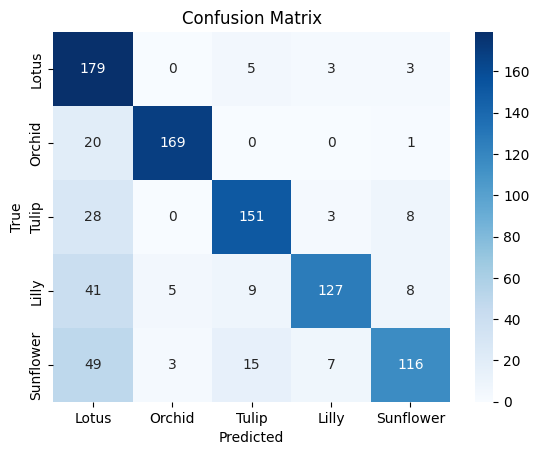

In [ ]:
# -----------------------------------
# Performance Metrics
# -----------------------------------
Categories = ['Lotus', 'Orchid', 'Tulip', 'Lilly','Sunflower']   # recorrect the categories to match the data

# Accuracy and Loss
train_loss, train_acc =KerasModel.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = KerasModel.evaluate(X_test, y_test, verbose=0)

print(f"\nTrain Accuracy: {train_acc:.2f}")
print(f"Train Loss: {train_loss:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Loss: {test_loss:.2f}")

# Predictions on Test Data
y_probs = KerasModel.predict(X_test)
y_pred = np.argmax(y_probs, axis=1)
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=Categories))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=Categories, yticklabels=Categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
## -----------------------------------
# Save the Model
# -----------------------------------
os.makedirs('/content/drive/MyDrive/Colab Notebooks/model_final/', exist_ok=True)
KerasModel.save('/content/drive/MyDrive/Colab Notebooks/model_final/NewFlowerModel.h5')
print("Model saved successfully at /content/drive/MyDrive/Colab Notebooks/model_final/NewFlowerModel.h5")

Model saved successfully at /content/drive/MyDrive/Colab Notebooks/model_final/NewFlowerModel.h5
